# Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It’s a classification problem , given information about the application we have to predict whether the they’ll be to pay the loan or not.

### Importing the Basics Libraries

In [1]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
# Checking the shape of train and test dataset

print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [5]:
# Checking the top five rows of the train dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Checking the last five rows of the train dataset
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### OBSERVATION:
There are some missing data in the dataset, which needs to be handled

In [7]:
# Checking the top five rows of the test dataset
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# Checking the top last rows of the test dataset
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [9]:
# Checking the basic statistics of the dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


#### OBSERVATION:
- There are some outlier present in the ApplicantIncome, CoapplicantIncome, LoanAmount columns.
- 84 % of the people have credit histroy as seen from the mean of credit histroy
- There seem to be imbalance in the dataset

### Combining train and test dataset

In [11]:
test['type'] = "test"
train['type'] = "train"

df = pd.concat([test, train],  ignore_index=True)

In [12]:
df.shape

(981, 14)

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,type,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,test,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,test,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,test,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,test,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,train,Y
977,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,train,Y
978,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,train,Y
979,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,train,Y


In [14]:
# Checking the data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  type               981 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


### Univariate Analysis

In [15]:
count = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']]

In [51]:
count.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,Urban,NaN
1,Male,Yes,1,Graduate,No,Urban,NaN
2,Male,Yes,2,Graduate,No,Urban,NaN
3,Male,Yes,2,Graduate,No,Urban,NaN
4,Male,No,0,Not Graduate,No,Urban,NaN


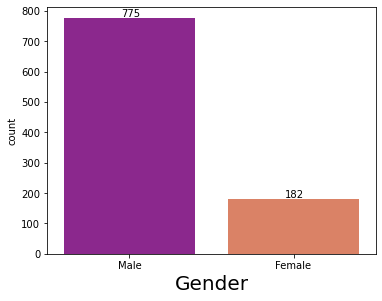

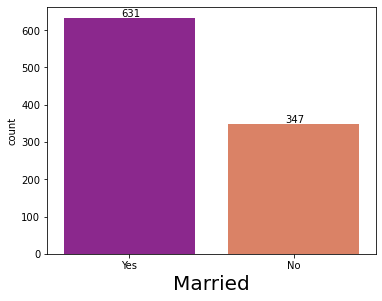

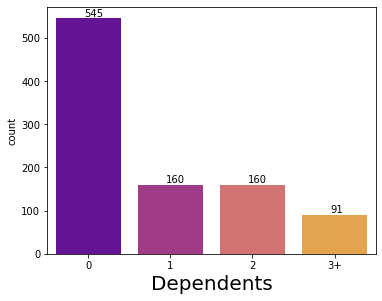

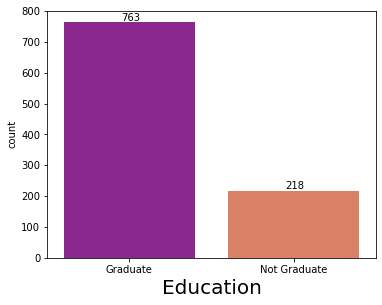

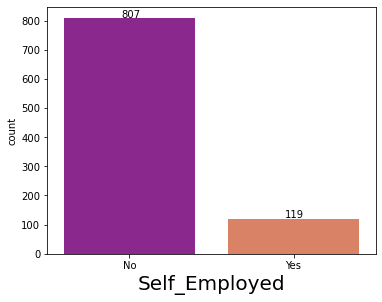

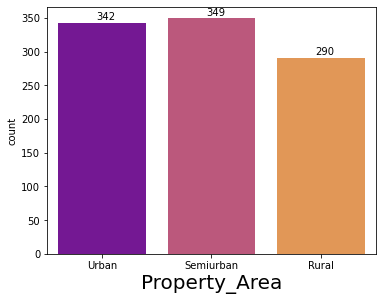

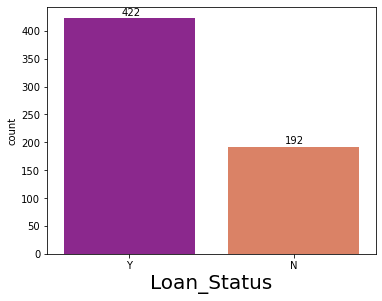

In [17]:
for i in count:
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,1)
    ax = sns.countplot(x=i, data=df, palette='plasma')
    plt.xlabel(i, fontsize=20) 
    
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5))

### OBSERVATION:


In [18]:
# Checking the counts of loan status

df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Data Cleaning

In [19]:
# Checking for missing values
 
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
type                   0
Loan_Status          367
dtype: int64

### Imputing the missing values using Fillna method

Imputing the missing values in categorical column with mode 

In [20]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Imputing the missing values in numerical column with median

In [21]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [22]:
# Checking for missing values
 
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
type                   0
Loan_Status          367
dtype: int64

### Outlier Detection and Handling

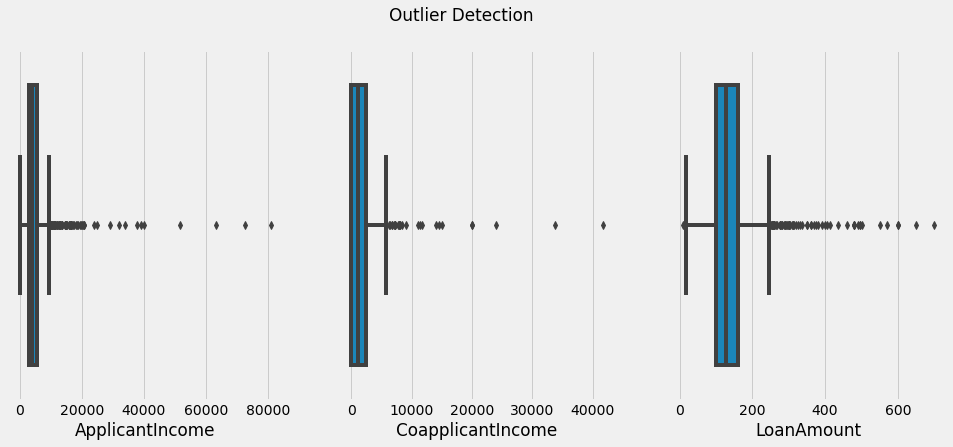

In [23]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,6)

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outlier Detection')
plt.show()

### Handling the outliers using Log Transform

In [24]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

Some people might have a low income but strong CoappliantIncome so a good idea is to combine them in a TotalIncome column.

In [25]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Count'>

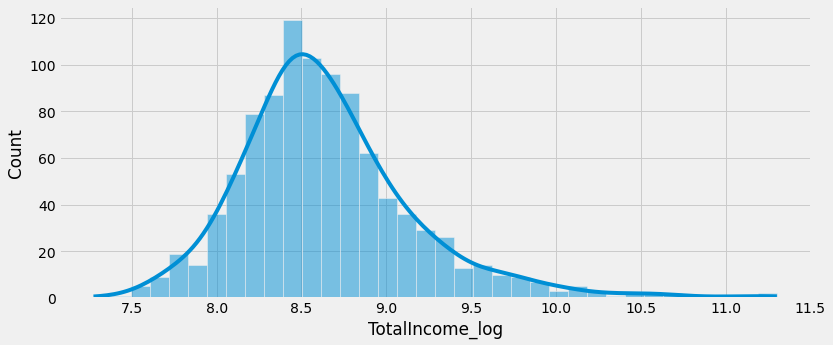

In [26]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='TotalIncome_log', kde=True)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

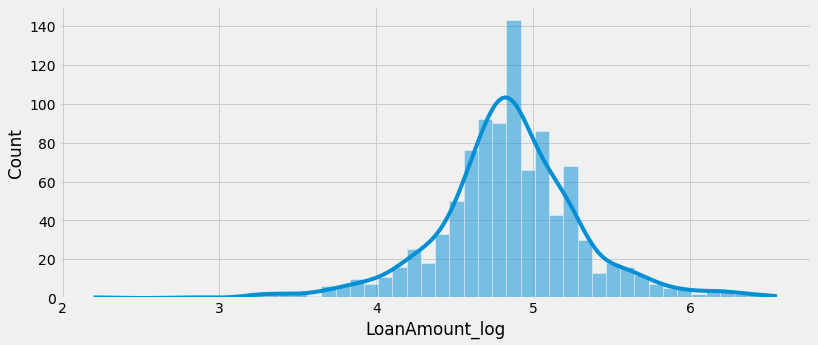

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='LoanAmount_log', kde=True)

In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'type',
       'Loan_Status', 'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

Seperating numerical and categorical columns

In [29]:
num = df.select_dtypes('number').columns.tolist()
cat = df.select_dtypes('object').columns.tolist()

In [30]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log']

In [31]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'type',
 'Loan_Status']

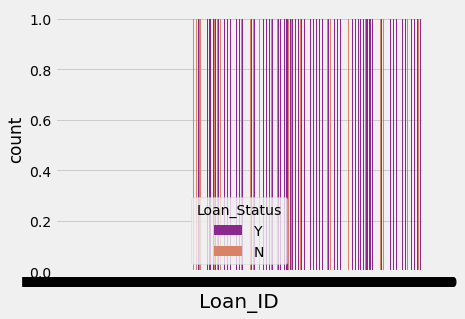

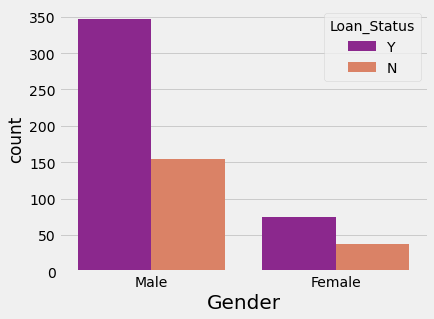

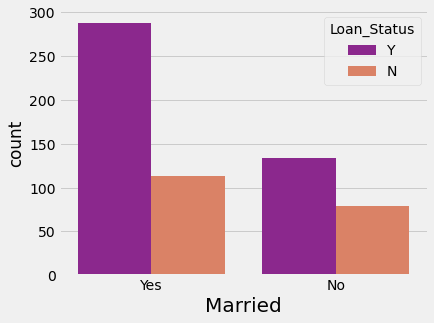

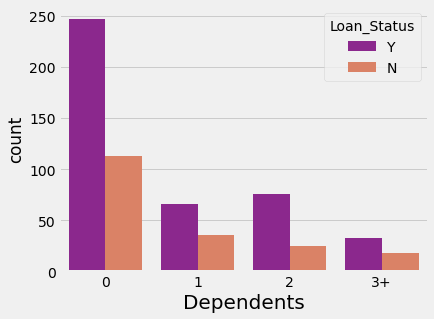

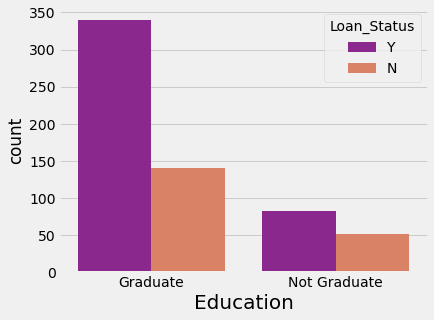

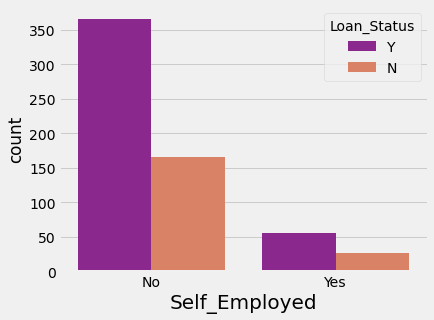

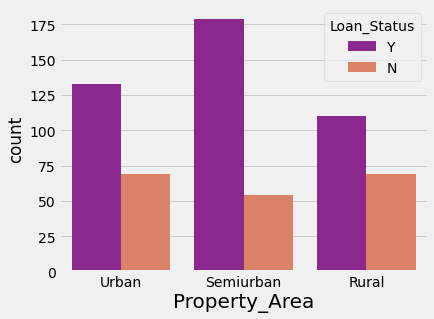

In [32]:
for i in cat[:-2]:
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue='Loan_Status', data=df, palette='plasma')
    plt.xlabel(i, fontsize=20)

### Data Preparation

In [33]:
df.select_dtypes('O').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,type,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,Urban,test,NaN
1,LP001022,Male,Yes,1,Graduate,No,Urban,test,NaN
2,LP001031,Male,Yes,2,Graduate,No,Urban,test,NaN
3,LP001035,Male,Yes,2,Graduate,No,Urban,test,NaN
4,LP001051,Male,No,0,Not Graduate,No,Urban,test,NaN


In [34]:
df = df.drop(['Loan_ID'], axis=1)

In [35]:
df.select_dtypes('O').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,type,Loan_Status
0,Male,Yes,0,Graduate,No,Urban,test,NaN
1,Male,Yes,1,Graduate,No,Urban,test,NaN
2,Male,Yes,2,Graduate,No,Urban,test,NaN
3,Male,Yes,2,Graduate,No,Urban,test,NaN
4,Male,No,0,Not Graduate,No,Urban,test,NaN


### Label Encoding

In [36]:
df['Gender'] = df['Gender'].replace(('Male', 'Female'),(1,0))
df['Married'] = df['Married'].replace(('Yes', 'No'),(1,0))
df['Dependents'] = df['Dependents'].replace(('0', '1', '2', '3+'),(0,1,1,1))
df['Education'] = df['Education'].replace(('Graduate', 'Not Graduate'),(1,0))
df['Self_Employed'] = df['Self_Employed'].replace(('Yes', 'No'),(1,0))
df['Property_Area'] = df['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1,1,0))
df['Loan_Status'] = df['Loan_Status'].replace(('Y', 'N'),(1,0))

In [37]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,type,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
128,1,0,0,1,0,3073,0.0,70.0,180.0,1.0,1,test,NaN,4.248495,3073.0,8.030410
747,1,1,0,1,0,3333,2500.0,128.0,360.0,1.0,1,train,1.0,4.852030,5833.0,8.671287
369,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,train,1.0,4.189655,3000.0,8.006368
821,1,0,0,1,1,7085,0.0,84.0,360.0,1.0,1,train,1.0,4.430817,7085.0,8.865735
942,1,1,1,1,0,3159,461.0,108.0,84.0,1.0,1,train,1.0,4.682131,3620.0,8.194229
492,0,0,0,1,0,3692,0.0,93.0,360.0,1.0,0,train,1.0,4.532599,3692.0,8.213924
284,0,1,1,1,0,10000,11666.0,460.0,360.0,1.0,1,test,NaN,6.131226,21666.0,9.983499
346,1,1,0,1,0,3391,1966.0,133.0,360.0,0.0,0,test,NaN,4.890349,5357.0,8.586159
463,0,1,0,1,0,2484,2302.0,137.0,360.0,1.0,1,train,1.0,4.919981,4786.0,8.473450
374,1,1,1,1,0,3036,2504.0,158.0,360.0,0.0,1,train,0.0,5.062595,5540.0,8.619750


### Converting back to train and test data

In [38]:
df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis = 1,inplace = True)

In [39]:
train = df[df['type'] == "train"]
test = df[df['type'] == "test"]

In [40]:
train.drop(['type'],axis = 1,inplace = True)
test.drop(['type','Loan_Status'],axis = 1,inplace = True)

In [41]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
367,1,0,0,1,0,360.0,1.0,1,1.0,4.836282,8.674026
368,1,1,1,1,0,360.0,1.0,0,0.0,4.852030,8.714568
369,1,1,0,1,1,360.0,1.0,1,1.0,4.189655,8.006368
370,1,1,0,0,0,360.0,1.0,1,1.0,4.787492,8.505323
371,1,0,0,1,0,360.0,1.0,1,1.0,4.948760,8.699515


In [42]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,1,1,0,1,0,360.0,1.0,1,4.700480,8.651724
1,1,1,1,1,0,360.0,1.0,1,4.836282,8.428581
2,1,1,1,1,0,360.0,1.0,1,5.337538,8.824678
3,1,1,1,1,0,360.0,1.0,1,4.605170,8.494129
4,1,0,0,0,0,360.0,1.0,1,4.356709,8.094378


# Standardization

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train[['Loan_Amount_Term','LoanAmount_log','TotalIncome_log']] = sc.fit_transform(train[['Loan_Amount_Term','LoanAmount_log','TotalIncome_log']])

In [44]:
test[['Loan_Amount_Term','LoanAmount_log','TotalIncome_log']] = sc.transform(test[['Loan_Amount_Term','LoanAmount_log','TotalIncome_log']])

In [45]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
367,1,0,0,1,0,0.273231,1.0,1,1.0,-0.041170,0.008468
368,1,1,1,1,0,0.273231,1.0,0,0.0,-0.009394,0.082903
369,1,1,0,1,1,0.273231,1.0,1,1.0,-1.345889,-1.217363
370,1,1,0,0,0,0.273231,1.0,1,1.0,-0.139615,-0.301273
371,1,0,0,1,0,0.273231,1.0,1,1.0,0.185780,0.055266


In [46]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,1,1,0,1,0,0.273231,1.0,1,-0.315181,-0.032478
1,1,1,1,1,0,0.273231,1.0,1,-0.041170,-0.442173
2,1,1,1,1,0,0.273231,1.0,1,0.970230,0.285068
3,1,1,1,1,0,0.273231,1.0,1,-0.507491,-0.321825
4,1,0,0,0,0,0.273231,1.0,1,-1.008819,-1.055774


### Balancing the dataset using SMOTE

In [47]:
X= train.drop(['Loan_Status'],axis=1)
y= train.Loan_Status

In [48]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample = SMOTE().fit_resample(X,y)

In [49]:
print(X.shape)
print(y.shape)

(614, 10)
(614,)


In [50]:
print(X_resample.shape)
print(y_resample.shape)

(844, 10)
(844,)


### Model Building